# Gold Price Data Analysis

### Adding the imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

### Creating the DataFrame

In [6]:
df = pd.read_csv("gold.csv")

### Reading the data

In [7]:
df.head()

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.1,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.6,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.6,1098.90,1098.90,67.50,1097.50


In [8]:
df.tail()

,time,open,high,low,close,rsi14,sma14
985999,2023-12-29 16:35:00,2063.07,2063.24,2062.60,2062.96,39.44,2063.48
986000,2023-12-29 16:40:00,2062.95,2063.09,2062.52,2062.61,37.12,2063.27
986001,2023-12-29 16:45:00,2062.60,2062.83,2062.34,2062.56,36.79,2063.06
986002,2023-12-29 16:50:00,2062.56,2063.20,2062.51,2062.54,36.65,2062.95
986003,2023-12-29 16:55:00,2062.52,2063.00,2062.37,2062.73,39.05,2062.90


### Exploring the data

In [9]:
df.shape

(986004, 7)

In [10]:
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'rsi14', 'sma14'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986004 entries, 0 to 986003
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    986004 non-null  object 
 1   open    986004 non-null  float64
 2   high    986004 non-null  float64
 3   low     986004 non-null  float64
 4   close   986004 non-null  float64
 5   rsi14   986004 non-null  float64
 6   sma14   986004 non-null  float64
dtypes: float64(6), object(1)
memory usage: 52.7+ MB


### Filtering and exploring the _null_ values

In [12]:
df.isnull().sum()

time     0
open     0
high     0
low      0
close    0
rsi14    0
sma14    0
dtype: int64

### Data Types

In [13]:
df.dtypes

time      object
open     float64
high     float64
low      float64
close    float64
rsi14    float64
sma14    float64
dtype: object

### Converting the "time" column datatype to date-time format

In [14]:
df['time'] = pd.to_datetime(df['time'])

In [15]:
df.head(2)

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72


In [16]:
df.dtypes

time     datetime64[ns]
open            float64
high            float64
low             float64
close           float64
rsi14           float64
sma14           float64
dtype: object

### Adding the "Year" column

In [17]:
df["Year"] = pd.to_datetime(df["time"]).dt.year

In [18]:
df.head(2)

,time,open,high,low,close,rsi14,sma14,Year
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38,2010
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72,2010


### Adding the "Month" column

In [19]:
df["Month"] = pd.to_datetime(df["time"]).dt.month

In [20]:
df.head(2)

,time,open,high,low,close,rsi14,sma14,Year,Month
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,81.98,1096.38,2010,1
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,79.17,1096.72,2010,1


## Research Questions

### Find the counts of data for each year from 2010 to 2023

In [21]:
df["Year"].value_counts()

Year
2010    72007
2011    71901
2012    71466
2013    71437
2018    70974
2022    70928
2020    70878
2014    70868
2016    70865
2015    70850
2019    70715
2021    70686
2017    70635
2023    61794
Name: count, dtype: int64

### Describe the dataset

In [22]:
df.describe()

,time,open,high,low,close,rsi14,sma14,Year,Month
count,986004,986004.000000,986004.000000,986004.000000,986004.000000,986004.000000,986004.000000,986004.000000,986004.000000
mean,2016-12-03 05:00:56.535165952,1480.687806,1481.201203,1480.169858,1480.688379,50.260961,1480.681750,2016.421386,6.534745
min,2010-01-03 18:00:00,1046.920000,1048.080000,1044.180000,1046.940000,3.000000,1048.840000,2010.000000,1.000000
25%,2013-06-09 19:53:45,1252.750000,1253.080000,1252.400000,1252.750000,42.810000,1252.740000,2013.000000,4.000000
50%,2016-11-28 12:52:30,1373.580000,1374.180000,1373.055000,1373.580000,50.250000,1373.580000,2016.000000,7.000000
75%,2020-05-24 19:21:15,1732.680000,1733.320000,1732.010000,1732.680000,57.730000,1732.660000,2020.000000,10.000000
max,2023-12-29 16:55:00,2138.000000,2145.140000,2125.980000,2138.410000,96.800000,2116.810000,2023.000000,12.000000
std,NaN,269.235947,269.360461,269.108012,269.235929,11.309953,269.230025,4.006693,3.435933


### Get the yearly mean of the data

In [23]:
df.groupby("Year").mean()

,time,open,high,low,close,rsi14,sma14,Month
Year,,,,,,,,
2010,2010-07-03 01:17:38.980376832,1226.402904,1226.855389,1225.947777,1226.406619,50.906802,1226.377547,6.546308
2011,2011-07-02 04:27:43.312054016,1572.499700,1573.226985,1571.759326,1572.501083,50.855584,1572.487957,6.517559
2012,2012-07-01 09:12:05.451263744,1668.967014,1669.508559,1668.419765,1668.968571,50.198505,1668.958563,6.492934
2013,2013-07-01 15:43:01.628567808,1411.354308,1411.925588,1410.778660,1411.347312,49.651223,1411.390275,6.501701
2014,2014-07-02 03:47:06.277021952,1266.374825,1266.762617,1265.988472,1266.375826,49.983571,1266.377550,6.514139
2015,2015-07-02 20:45:27.544107264,1160.265294,1160.641160,1159.886700,1160.263601,49.753269,1160.274830,6.539520
2016,2016-07-02 08:49:53.810766848,1249.738301,1250.194688,1249.282859,1249.739879,50.181805,1249.731631,6.527905
2017,2017-07-02 03:19:37.829687808,1258.239852,1258.556658,1257.923844,1258.242459,50.318965,1258.228500,6.512536
2018,2018-07-01 16:40:10.639107328,1268.878050,1269.182729,1268.570123,1268.878042,49.935284,1268.879853,6.501099


### Get the yearly median of the data

In [24]:
df.groupby("Year").median()

,time,open,high,low,close,rsi14,sma14,Month
Year,,,,,,,,
2010,2010-07-02 02:45:00,1213.030,1213.480,1212.630,1213.05,51.01,1212.990,7.0
2011,2011-07-01 10:45:00,1543.680,1544.030,1543.230,1543.68,50.94,1543.580,7.0
2012,2012-07-02 10:02:30,1663.540,1663.970,1663.100,1663.55,50.13,1663.470,7.0
2013,2013-07-02 06:40:00,1372.610,1373.330,1371.850,1372.60,49.59,1372.690,7.0
2014,2014-07-02 11:32:30,1276.045,1276.380,1275.705,1276.05,49.84,1276.270,7.0
2015,2015-07-02 13:12:30,1167.740,1168.020,1167.435,1167.75,49.67,1167.740,7.0
2016,2016-07-01 13:45:00,1256.810,1257.260,1256.340,1256.81,50.30,1256.840,7.0
2017,2017-07-03 06:45:00,1260.940,1261.260,1260.640,1260.93,50.38,1260.950,7.0
2018,2018-07-02 13:27:30,1263.260,1263.550,1262.985,1263.27,49.98,1263.305,7.0


### Get the yearly standard deviation of the data

In [25]:
df.groupby("Year").std()

,time,open,high,low,close,rsi14,sma14,Month
Year,,,,,,,,
2010,104 days 17:29:18.192700946,98.472636,98.487452,98.458902,98.474205,11.202265,98.458260,3.428056
2011,104 days 16:58:58.826020900,148.750205,149.011758,148.477693,148.748038,11.274230,148.742398,3.426630
2012,104 days 10:58:32.919521088,63.487969,63.455455,63.517688,63.486454,11.223318,63.479299,3.416557
2013,104 days 10:49:46.105186744,146.976244,146.921123,147.030746,146.975028,11.325895,146.974807,3.425364
2014,104 days 22:25:06.738120882,50.477353,50.437169,50.513173,50.477642,11.310463,50.465528,3.444761
2015,104 days 16:34:33.968200622,57.102919,57.136592,57.070192,57.103837,11.334463,57.088282,3.431478
2016,104 days 15:57:06.349178966,73.128703,73.141221,73.114338,73.126796,11.332305,73.134476,3.418884
2017,104 days 08:13:52.683591832,34.245329,34.230696,34.255470,34.242950,11.221710,34.247994,3.418688
2018,104 days 15:24:20.623188454,53.952171,53.975590,53.927134,53.952250,11.350866,53.948452,3.425028


### Find all instances when gold was oversold ("rsi14" < 25)

In [26]:
df[df["rsi14"] < 25]

,time,open,high,low,close,rsi14,sma14,Year,Month
429,2010-01-05 06:15:00,1122.23,1122.23,1120.63,1120.95,24.38,1124.08,2010,1
430,2010-01-05 06:20:00,1120.88,1120.88,1119.55,1120.48,22.81,1123.70,2010,1
515,2010-01-05 13:25:00,1118.93,1119.00,1118.23,1118.33,24.59,1120.77,2010,1
516,2010-01-05 13:30:00,1118.18,1118.23,1115.40,1115.70,17.15,1120.30,2010,1
517,2010-01-05 13:35:00,1115.53,1116.48,1115.53,1115.88,18.96,1119.86,2010,1
...,...,...,...,...,...,...,...,...,...
985859,2023-12-29 04:55:00,2066.22,2066.22,2065.25,2065.46,19.61,2068.15,2023,12
985860,2023-12-29 05:00:00,2065.44,2065.66,2064.40,2064.74,17.64,2067.76,2023,12
985861,2023-12-29 05:05:00,2064.80,2065.52,2064.64,2064.86,19.12,2067.49,2023,12
985863,2023-12-29 05:15:00,2065.48,2065.48,2062.53,2062.53,18.04,2066.79,2023,12


### Find all instances when gold was overbought ("rsi14" > 70)

In [27]:
df[df["rsi14"] > 70]

,time,open,high,low,close,rsi14,sma14,Year,Month
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38,2010,1
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72,2010,1
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03,2010,1
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30,2010,1
40,2010-01-03 21:20:00,1098.00,1098.63,1098.00,1098.30,70.26,1095.88,2010,1
...,...,...,...,...,...,...,...,...,...
985811,2023-12-29 00:55:00,2070.51,2072.18,2070.51,2072.11,72.75,2070.26,2023,12
985812,2023-12-29 01:00:00,2072.11,2072.76,2071.66,2072.70,75.71,2070.45,2023,12
985815,2023-12-29 01:15:00,2072.41,2072.63,2072.23,2072.54,70.81,2070.97,2023,12
985825,2023-12-29 02:05:00,2073.07,2074.26,2072.96,2073.89,73.11,2072.57,2023,12


### Correlation Matrix

In [28]:
df.corr()

,time,open,high,low,close,rsi14,sma14,Year,Month
time,1.000000,0.526662,0.526509,0.526822,0.526663,-0.005123,0.526665,0.997443,0.078854
open,0.526662,1.000000,0.999997,0.999996,0.999995,0.013887,0.999982,0.524290,0.055545
high,0.526509,0.999997,1.000000,0.999994,0.999997,0.014429,0.999979,0.524140,0.055493
low,0.526822,0.999996,0.999994,1.000000,0.999997,0.014587,0.999978,0.524446,0.055595
close,0.526663,0.999995,0.999997,0.999997,1.000000,0.014916,0.999978,0.524290,0.055543
rsi14,-0.005123,0.013887,0.014429,0.014587,0.014916,1.000000,0.009989,-0.004704,-0.005444
sma14,0.526665,0.999982,0.999979,0.999978,0.999978,0.009989,1.000000,0.524290,0.055567
Year,0.997443,0.524290,0.524140,0.524446,0.524290,-0.004704,0.524290,1.000000,0.007661
Month,0.078854,0.055545,0.055493,0.055595,0.055543,-0.005444,0.055567,0.007661,1.000000


## Visual Analysis

### Variation of opening price of gold from 2010 to 2023

In [29]:
yearly_var = {year: df[df['time'].dt.year == year] for year in range(2010, 2024)}

In [33]:
df2010 = yearly_var[2010]
df2011 = yearly_var[2011]
df2012 = yearly_var[2012]
df2013 = yearly_var[2013]
df2014 = yearly_var[2014]
df2015 = yearly_var[2015]
df2016 = yearly_var[2016]
df2017 = yearly_var[2017]
df2018 = yearly_var[2018]
df2019 = yearly_var[2019]
df2020 = yearly_var[2020]
df2021 = yearly_var[2021]
df2022 = yearly_var[2022]
df2023 = yearly_var[2023]

combined_df = pd.concat([df2010, df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022, df2023])

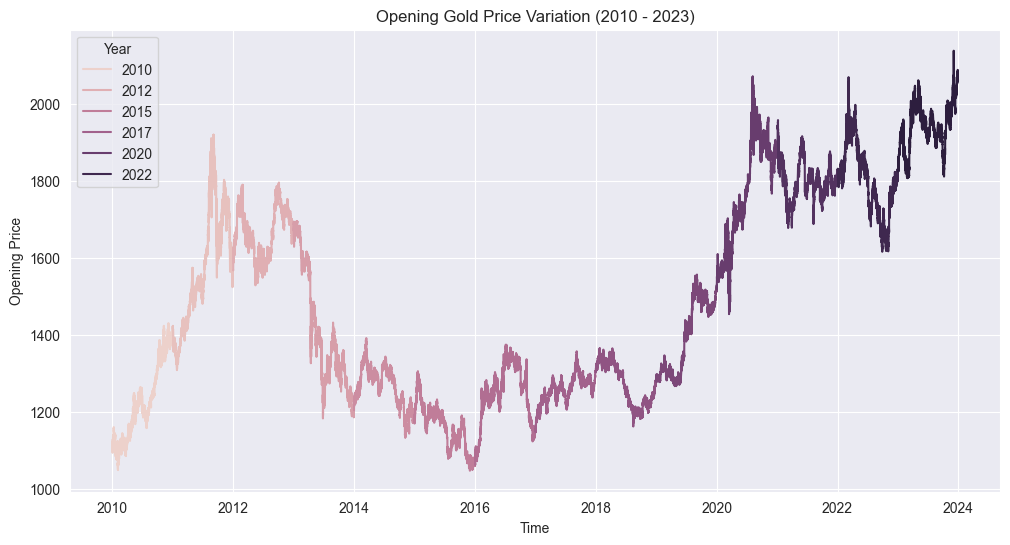

In [34]:
sb.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sb.lineplot(data=combined_df, x="time", y="open", hue=combined_df['time'].dt.year)
plt.title("Opening Gold Price Variation (2010 - 2023)")
plt.xlabel("Time")
plt.ylabel("Opening Price")
plt.legend(title="Year")
plt.show()

### Variation of closing price of gold from 2010 to 2023

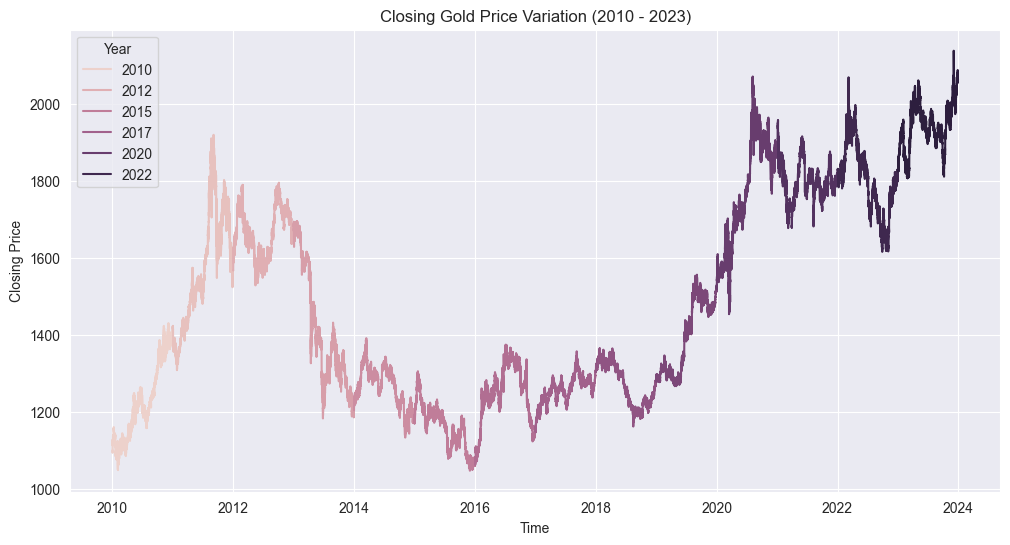

In [35]:
sb.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sb.lineplot(data=combined_df, x="time", y="close", hue=combined_df['time'].dt.year)
plt.title("Closing Gold Price Variation (2010 - 2023)")
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.legend(title="Year")
plt.show()

### Variation of low rate of gold from 2010 to 2023

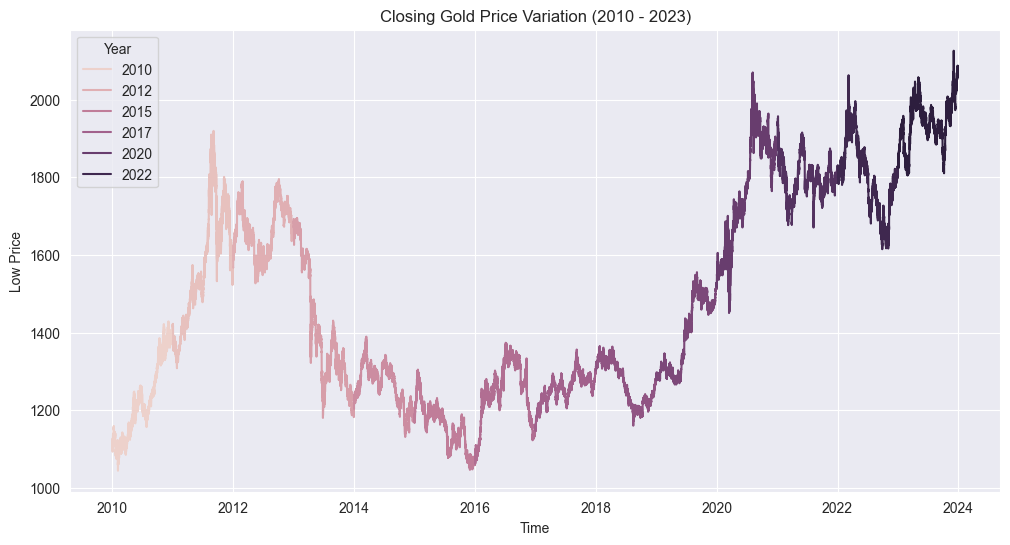

In [36]:
sb.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sb.lineplot(data=combined_df, x="time", y="low", hue=combined_df['time'].dt.year)
plt.title("Closing Gold Price Variation (2010 - 2023)")
plt.xlabel("Time")
plt.ylabel("Low Price")
plt.legend(title="Year")
plt.show()

### Variation of high rate of gold from 2010 to 2023

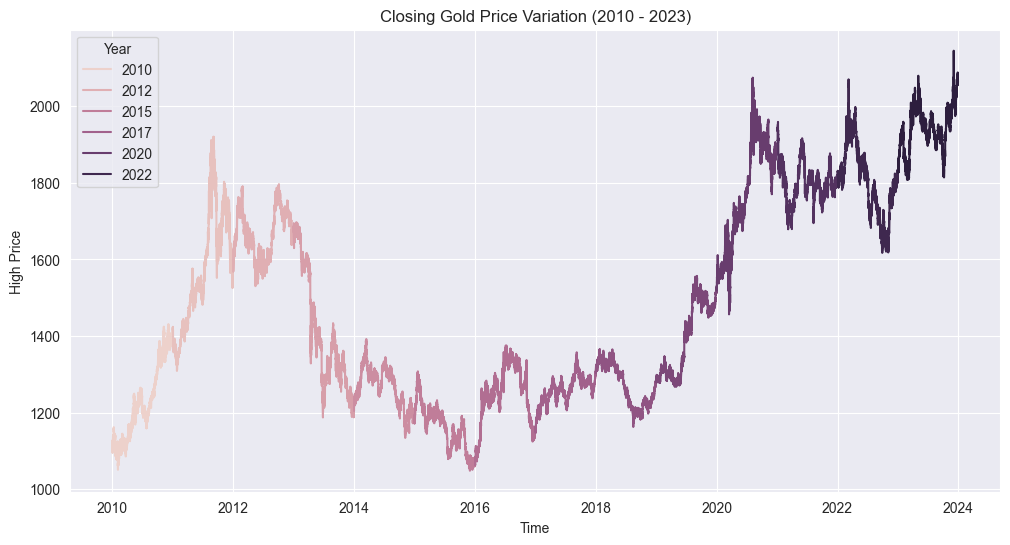

In [37]:
sb.set_style("darkgrid")

plt.figure(figsize=(12, 6))
sb.lineplot(data=combined_df, x="time", y="high", hue=combined_df['time'].dt.year)
plt.title("Closing Gold Price Variation (2010 - 2023)")
plt.xlabel("Time")
plt.ylabel("High Price")
plt.legend(title="Year")
plt.show()

### "rsi14" variation over the year using subplots

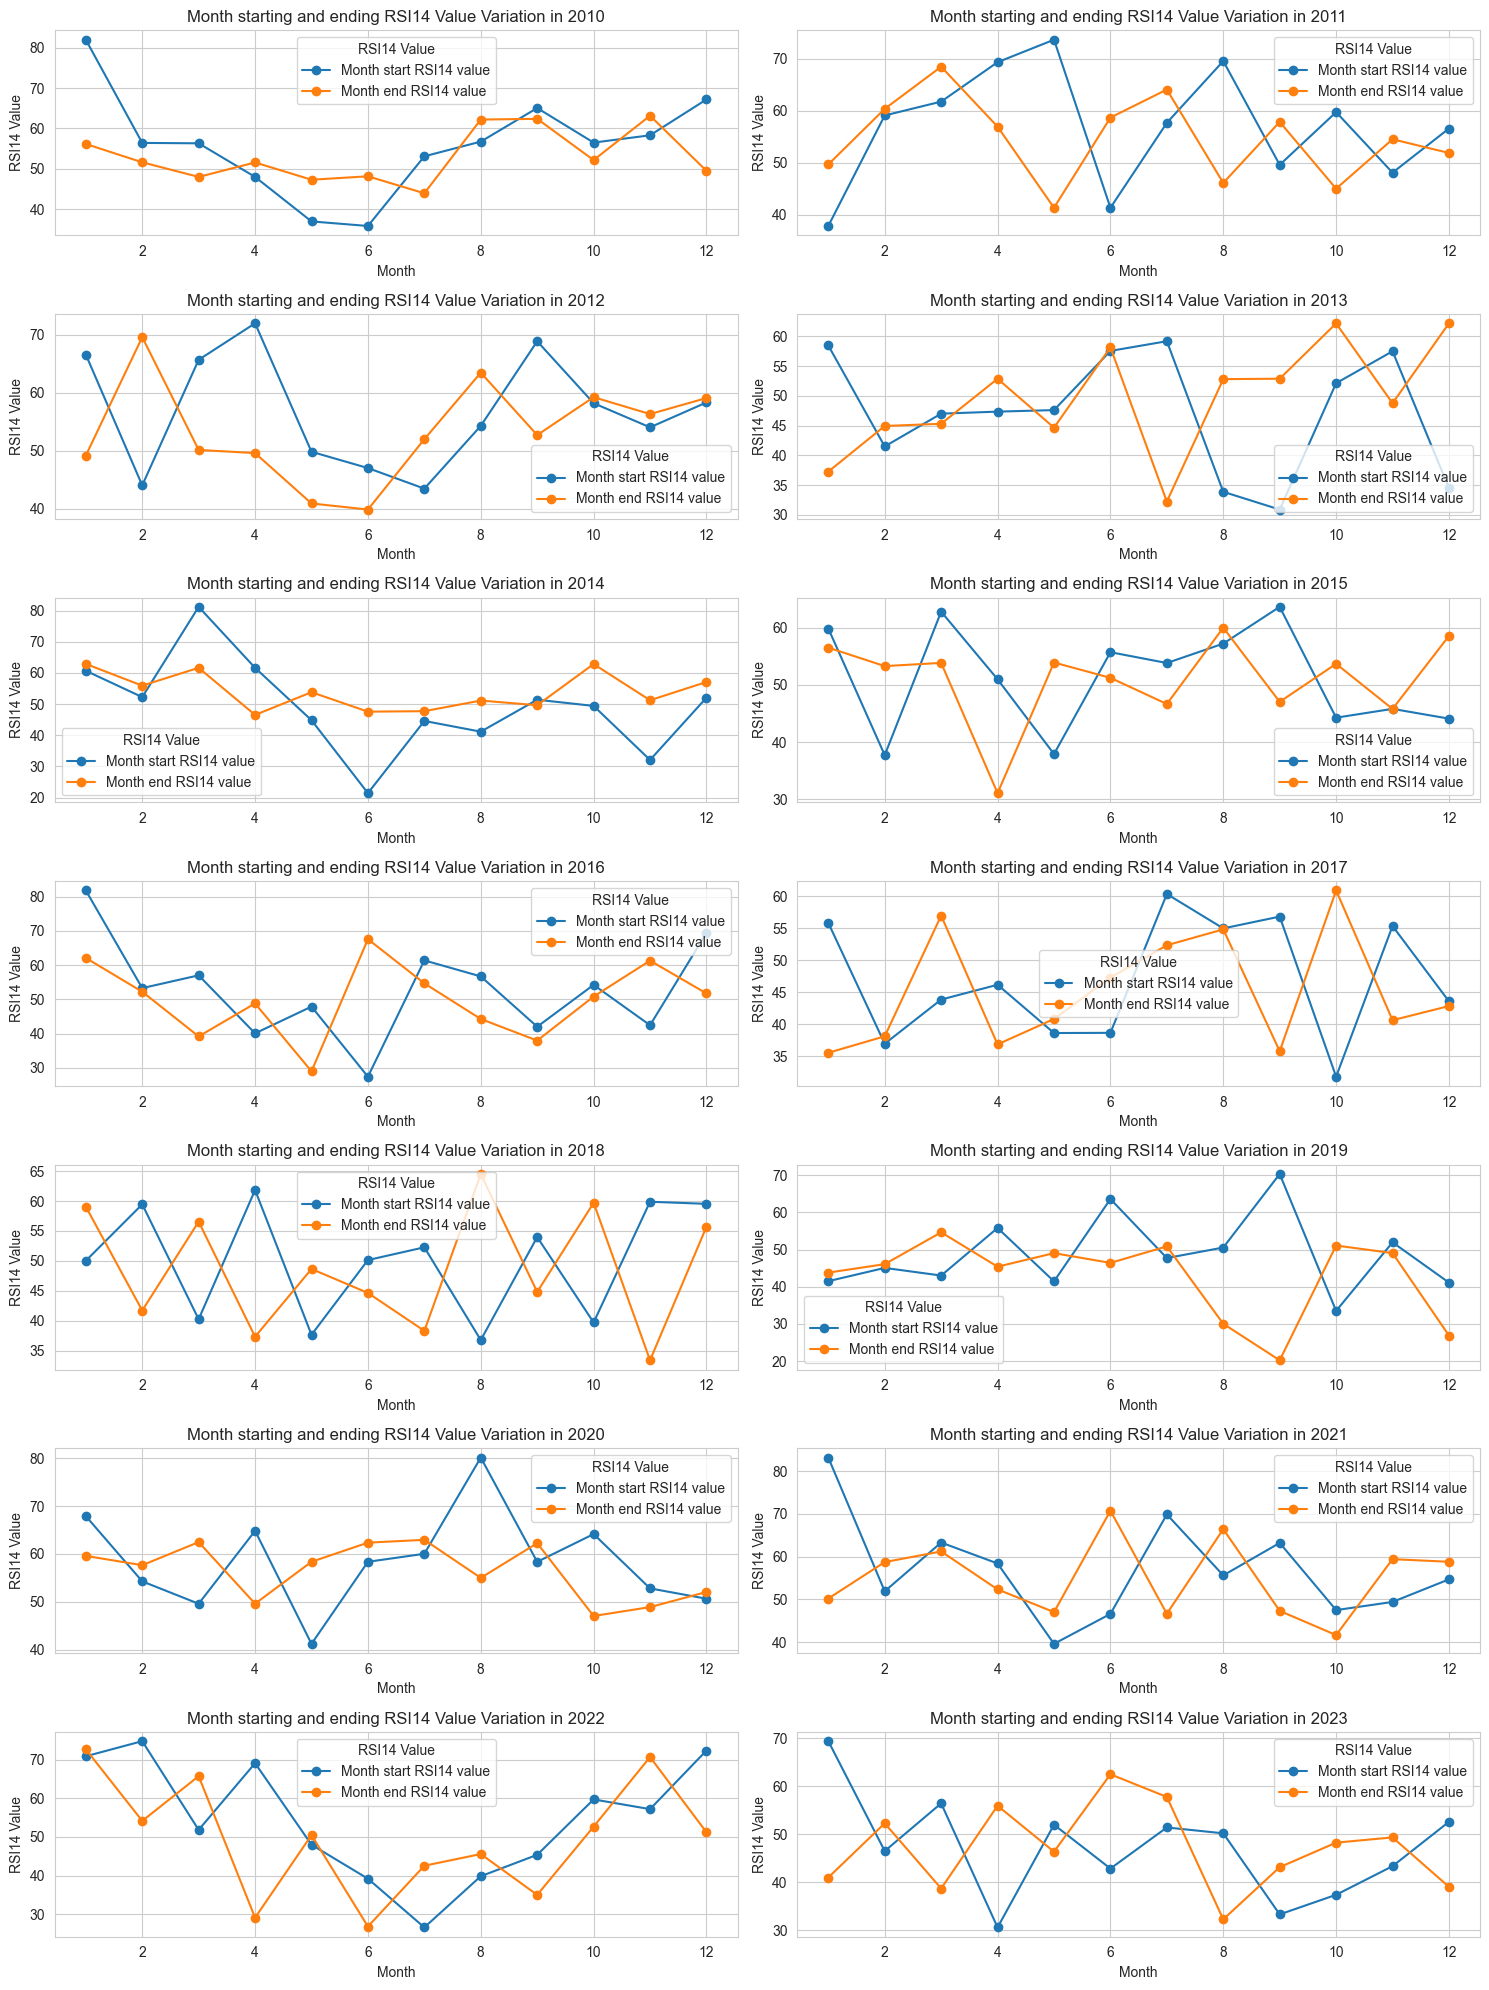

In [60]:
years_data = {}
for year in range(2010, 2024):
    years_data[year] = df[df['time'].dt.year == year]

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))

for i, year in enumerate(range(2010, 2024)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    monthly_rsi = years_data[year].groupby(years_data[year]['time'].dt.month)['rsi14'].agg(['first', 'last'])
    monthly_rsi.reset_index(inplace=True)
    
    ax.plot(monthly_rsi['time'], monthly_rsi['first'], marker="o", label="Month start RSI14 value")
    ax.plot(monthly_rsi['time'], monthly_rsi['last'], marker="o", label="Month end RSI14 value")
    ax.set_title(f"Month starting and ending RSI14 Value Variation in {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("RSI14 Value")
    ax.legend(title="RSI14 Value")

plt.tight_layout()
plt.show()

### "sma14" variation over the year using subplots

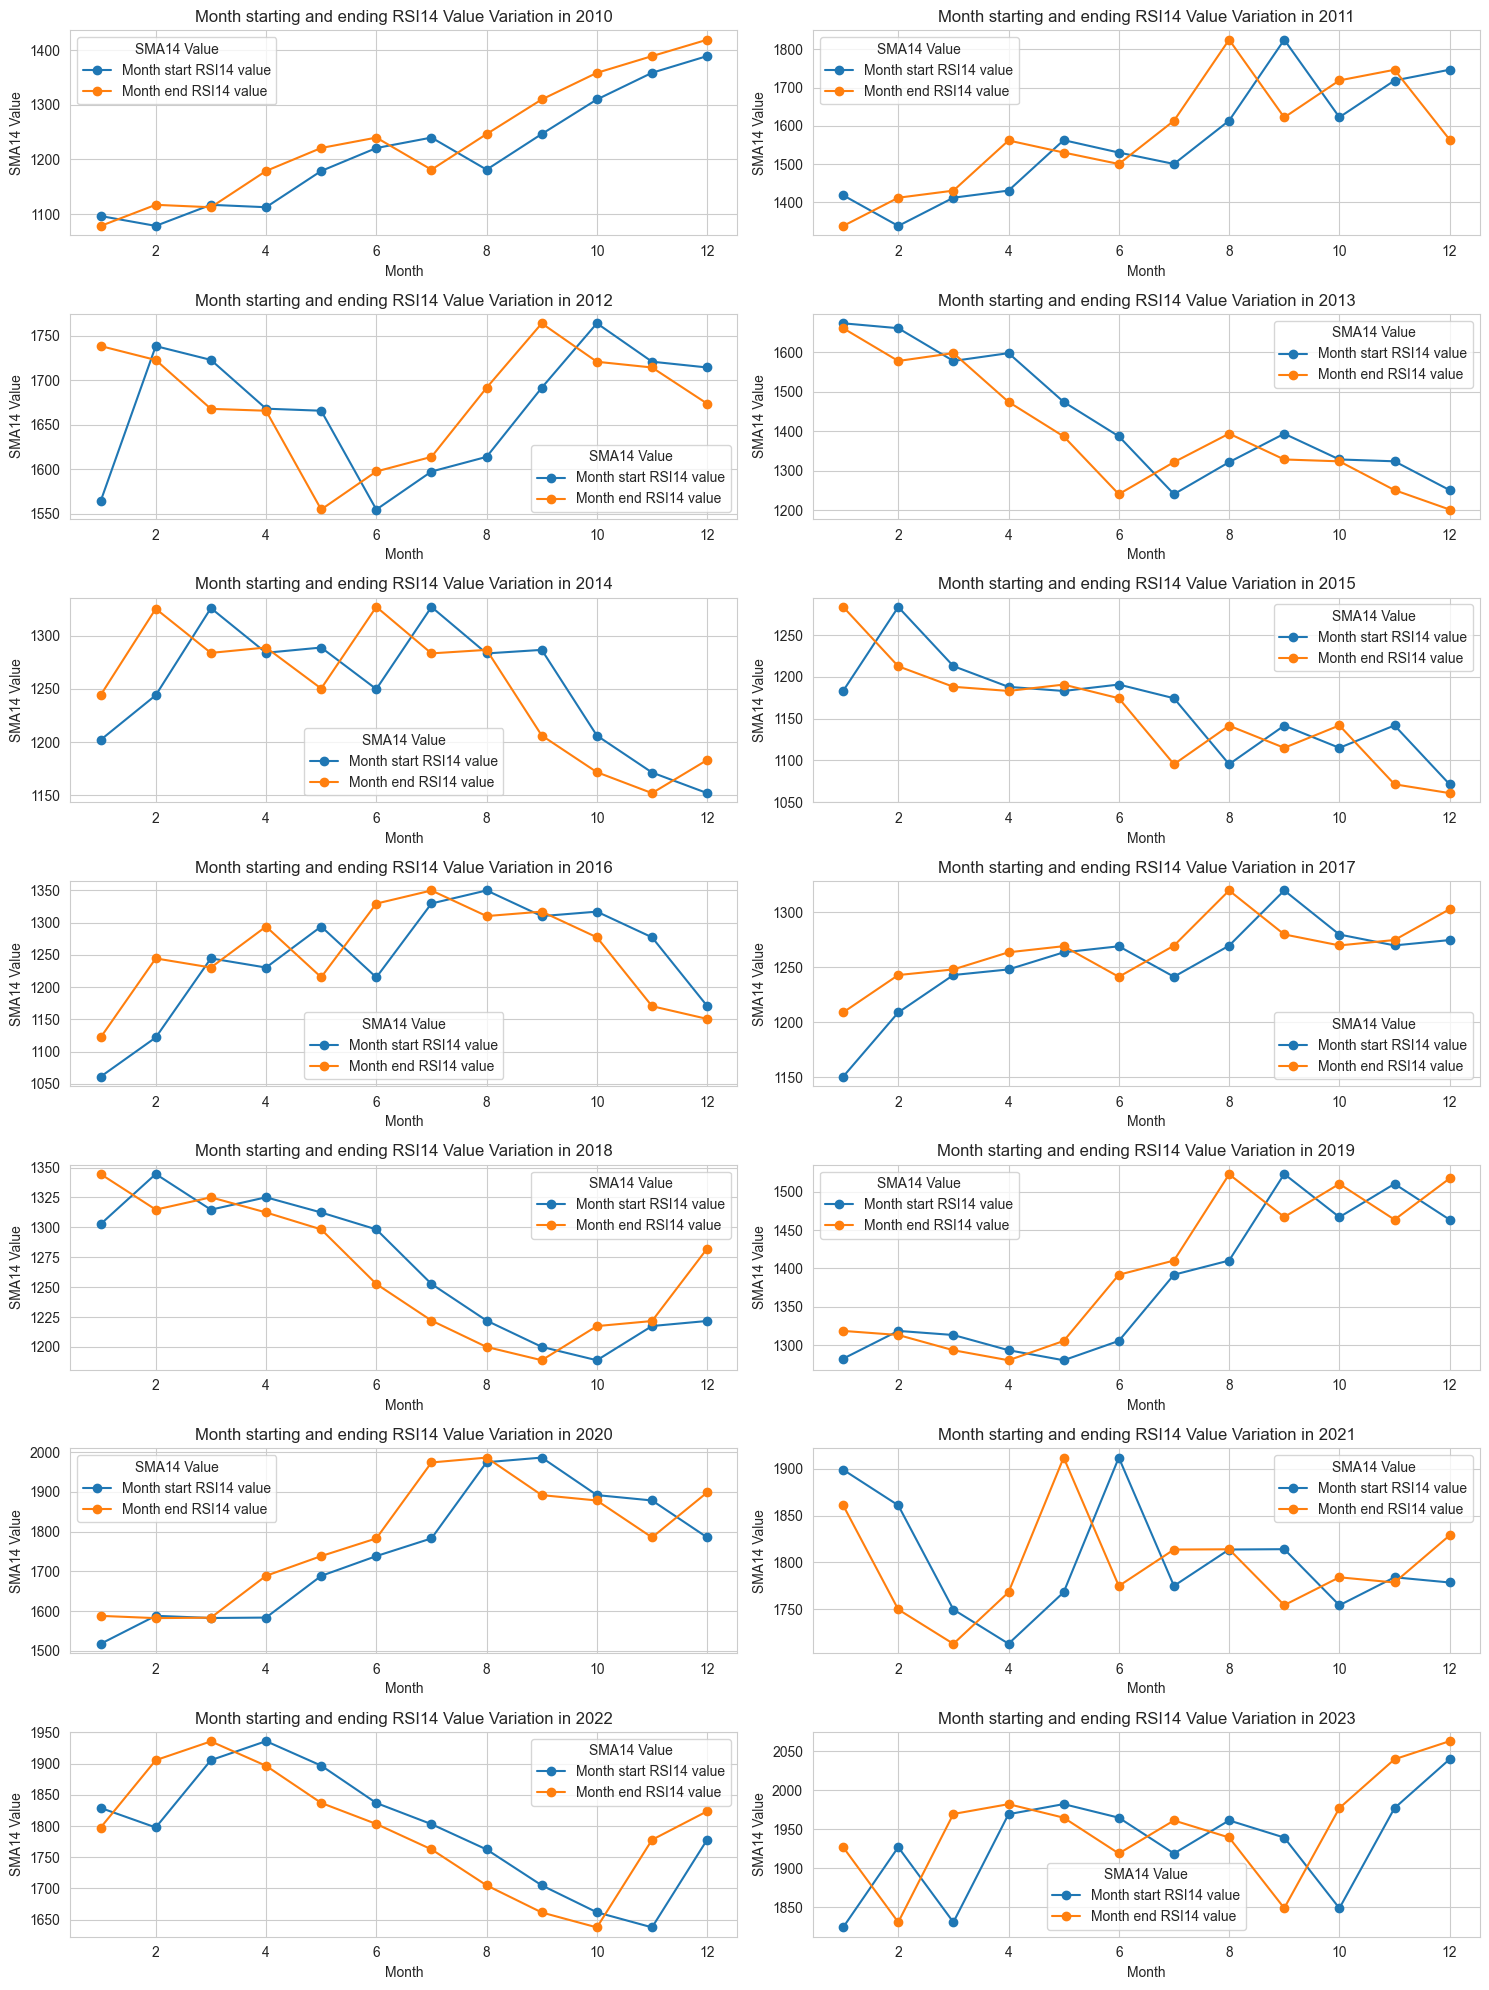

In [61]:
# Filter data for each year from 2010 to 2023
years_data = {}
for year in range(2010, 2024):
    years_data[year] = df[df['time'].dt.year == year]

# Set up subplots
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))

# Iterate over each year's data and plot
for i, year in enumerate(range(2010, 2024)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Extract first and last RSI14 values for each month
    monthly_rsi = years_data[year].groupby(years_data[year]['time'].dt.month)['sma14'].agg(['first', 'last'])
    monthly_rsi.reset_index(inplace=True)
    
    # Plot the data
    ax.plot(monthly_rsi['time'], monthly_rsi['first'], marker="o", label="Month start RSI14 value")
    ax.plot(monthly_rsi['time'], monthly_rsi['last'], marker="o", label="Month end RSI14 value")
    ax.set_title(f"Month starting and ending RSI14 Value Variation in {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("SMA14 Value")
    ax.legend(title="SMA14 Value")

# Adjust layout
plt.tight_layout()
plt.show()